# Motivation for a Different Model

With feedforward neural networks, we performed pretty well with MNIST and Fashion MNIST datasets. But, these images are simple and centered within the input space that contains them. Feedforward neural networks are very good at identifying patterns. So, if images occupy the same position within their input space, feedforward nets can quickly and effectively identify the image patterns. And, if the images are simple, the patterns emerge more easily. But, if images don't occupy the same positions in their input spaces, feedforward nets have great difficulty identifying the patterns and thereby perform horribly! So, we need a different model to work with these types of images.

# Convolutional Neural Network

We can train complex and off-center images with convolutional neural networks and get good results. A **convolutional neural network** (CNN) is a type of neural network that is most often applied to image processing problems, but can can also be used in natural language processing projects.

Convolutional Neural Networks work differently than feedforward networks because they treat data as spatial. Instead of neurons being connected to every neuron in the previous layer, they are instead only connected to neurons close to them and all have the same weight. This simplification in the connections means the network upholds the spatial aspect of the dataset.

Suppose the image is a profile of a child's face. A CNN doesn't think the child's eye is repeated all over the image. It can efficiently locate the child's eye in the image because of the filtering process that it undertakes.

# CNN Architecture

Like a feedforward neural network, a CNN consists of multiple layers. However, the convolutional layer and pooling layer make it unique. Like other neural networks, it also has a ReLU (rectified linear unit) layer and a fully connected layer. The ReLU layer in **any** neural net acts as an activation function ensuring nonlinearity as the data moves through each layer of the network. Without ReLU activation, the data being fed into each layer would lose the dimensionality that we want it to maintain. That is, we would lose the itegrity of the original data as it moves through the network. The fully connected layer allows a CNN to perform classification on the data.

The most important building block of a CNN is the **convolutional layer**. Neurons in the first convolutional layer are <strong><font color=red>not</font></strong> connected to every single pixel in the input image, but only to pixels in their receptive fields. That is, only to pixels close to them. A convolutional layer works by placing a filter over an array of image pixels. The filtering process creates a convolved feature map. A *convolved feature map* is the output of a convolutional layer.

A **feature map** is created by projecting input features from our data to hidden units to form new features to feed to the next layer. A **hidden unit** corresponds to the output of a single filter at a single particular x/y offset in the input volume. Simply, a hidden unit is the value at a particular x,y,z coordinate in the output volume.

Once we have a convolved feature map, we move to the pooling layer. The **pooling layer** subsamples a paticular feature map. Subsampling shrinks the size of the input image to reduce computational load, memory usage, and the number of parameters. Reducing the number of parameters the network needs to process also limits the risk of overfitting. The output of the pooling layer is a *pooled feature map*.

There are two ways to pool feature maps. **Max pooling** takes the maximum input of a particular convolved feature map. **Average pooling** takes the average input of a particular convolved feature map.

The process of creating pooled feature maps results in feature extraction that enables the network to build up a picture of the image data. With a picture of the image data, the network moves into the fully connected layer to perform classification. As we did with feedforward nets, we had to flatten the data for consumption by the fully connected layer because it can only process linear data.

Conceptually, a CNN is pretty complex as you can tell from our discussion. But, implementing a CNN in TensorFlow is pretty straightforward. In TensorFlow, each input image is typically represented as a 3D tensor of shape *height*, *width*, and *channels*. When classifying a 3D color image, we feed a CNN image data in three channels, namely, **Red**, **Green**, and **Blue**. Color images are typically referred to as **RGB images**. A batch (e.g., mini-batch) is represented as a 4D tensor of shape *batch size*, *height*, *width*, and *channels*.

Enable the GPU (if not already enabled):
1.	click **Runtime** in the top left menu
2.	click **Change runtime type** from the drop-down menu
3.	choose **GPU** from the *Hardware accelerator* drop-down menu
4.	click **SAVE**

In [1]:
import tensorflow as tf

# display tf version and test if GPU is active
tf.__version__, tf.test.gpu_device_name()

('2.3.0', '/device:GPU:0')

Import the tensorflow library. If '/device:GPU:0' is displayed, the GPU is active. If '..' is displayed, the regular CPU is active.

# Load Sample Images

Let's begin by looking at a simple example. Scikit-Learn allows us to practice with two color images with the **load_sample_image** method.

This method loads the numpy array of a single sample image and returns it as a 3D numpy array consisting of height by width by color.

In [2]:
from sklearn.datasets import load_sample_image

china, flower = load_sample_image('china.jpg'),\
load_sample_image('flower.jpg')
china.shape, flower.shape

((427, 640, 3), (427, 640, 3))

Both images are 427 x 640 with 3 channels to account for color.

# Display Images

 Let's display the input images.

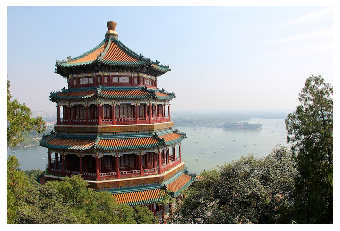

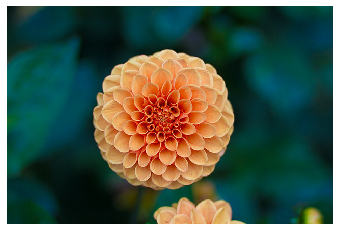

In [3]:
import matplotlib.pyplot as plt

# function to plot RGB images

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

plot_color_image(china)
plt.show()
plot_color_image(flower)

# Scale Images

Let's scale the images by dividing by 255. Remember that each pixel in an image is represented by a byte from 0 to 255. And, its number is its pixel intensity.

In [5]:
import numpy as np

# slice off a few pixels prior to scaling

br = '\n'

print ('pixels as loaded:', br)

print ('china pixels:', end = '  ')
print (np.around(china[0][0]))

print ('flower pixels:', end = ' ')
print (np.around(flower[0][0]), br)

# scale images

china_sc, flower_sc = china / 255., flower / 255.

# slice off some pixels to verify that scaling worked

print ('pixels scaled:', br)

print ('china pixels:', end = '  ')
print (np.around(china_sc[0][0], decimals=3))

print ('flower pixels:', end = ' ')
print (np.around(flower_sc[0][0], decimals=3))

pixels as loaded: 

china pixels:  [174 201 231]
flower pixels: [ 2 19 13] 

pixels scaled: 

china pixels:  [0.682 0.788 0.906]
flower pixels: [0.008 0.075 0.051]


It looks like scaling worked because pixel intensity is between 0 and 1.

# Display Scaled Images

Let's plot the scaled images.

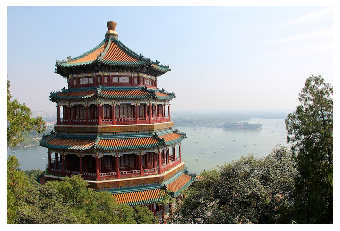

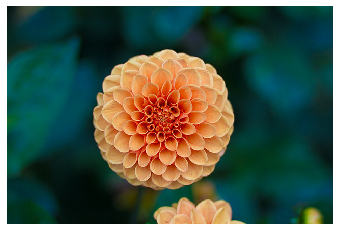

In [6]:
plot_color_image(china_sc)
plt.show()
plot_color_image(flower_sc)

We just verified that scaling doesn't impact images. This makes perfect sense because scaling modifies pixel intensity proportionally. That is, each pixel is converted proportionally to a number between 0 and 1.

# Get More Images

Let's get a couple more images. To get images for this book, just follow these simple steps:

1. go to the GitHub URL for this book: https://github.com/paperd/tensorflow
2. locate the image you want to download and click on it
3. click the **Download** button
4. right click in the image
5. click **Save image as ...**
6. save the image on your computer
7. drag and drop the image to your Google Drive **Colab Notebooks** folder
8. repeat as necessary for multiple images

Specifically for this lesson, click **chapter7**, click **images**, click **fish.jpg**, click the **Download** button, right click in the image, and **Save image as ...** on your computer. Drag and drop the image to your Google Drive **Colab Notebooks** folder. Repeat the same process for the **happy_moon.jpg** image.

# Mount Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Click on the URL, choose a Google account, click **Allow**, copy the authorization code and paste it into Colab, and press the Enter key.

Be sure that you have the file in the **Colab Notebooks** directory on your Google Drive!

# Copy Images to Google Drive

Before executing the following code snippet, please go to the URL for the book and copy the 'fish.jpg' and 'happy_moon.jpg' images to your Google Drive account. Also, check your Google Drive account to verify the proper path. We saved the images to the 'Colab Notebooks' directory, which is recommended. If you save it somewhere else, you must change the paths accordingly.

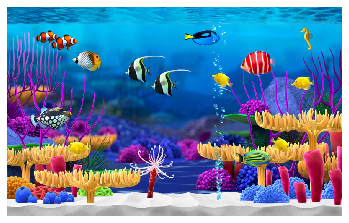

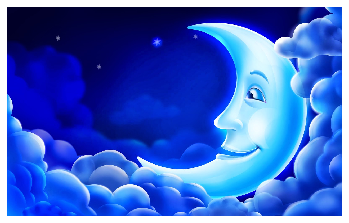

In [8]:
# Be sure to copy images to the directory on Google Drive

from PIL import Image
import numpy as np

# create paths to images

fish_path = 'drive/My Drive/Colab Notebooks/fish.jpg'
moon_path = 'drive/My Drive/Colab Notebooks/happy_moon.jpg'

# create images

fish, moon  = Image.open(fish_path), Image.open(moon_path)

# convert images to numpy arrays and scale

fish_np, moon_np = np.array(fish), np.array(moon)
fish_sc, moon_sc = fish_np / 255., moon_np / 255.

# display images

plot_color_image(fish_sc)
plt.show()
plot_color_image(moon_sc)

# Check Image Shapes

For machine learning applications, images must be of the same shape. So, we need to investigate before we move forward.

In [9]:
print ('original shapes:')
display (china_sc.shape, flower_sc.shape)
print (), print ('new shapes:')
display (fish_sc.shape, moon_sc.shape)

original shapes:


(427, 640, 3)

(427, 640, 3)


new shapes:


(500, 800, 3)

(1000, 1600, 3)

Uh oh! Shapes are not the same!

## Resize Images

Resize images to the new size:

In [10]:
fish_rs = np.array(tf.image.resize(
    fish_sc, [427, 640]))

moon_rs = np.array(tf.image.resize(
    moon_sc, [427, 640]))

fish_rs.shape, moon_rs.shape

((427, 640, 3), (427, 640, 3))

Now, all four images have size (427, 640, 3).

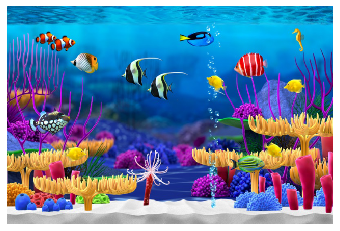

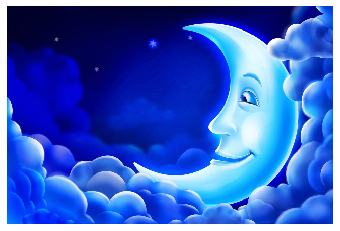

In [11]:
plot_color_image(fish_rs)
plt.show()
plot_color_image(moon_rs)

Success! We resized the images and they look good at least to our eyes. Just to be sure, let's check that the images were scaled between 0 and 1.

In [12]:
# slice off some pixels and display

print ('fish pixels:', end = ' ')
print (np.around(fish_rs[0][0], decimals=3), br)

print ('moon pixels:', end = ' ')
print (np.around(moon_rs[0][0], decimals=3))

fish pixels: [0.046 0.526 0.679] 

moon pixels: [0.008 0.004 0.169]


# Create a Batch with All Four Images

In [13]:
new_images = np.array([china_sc, flower_sc,
                       fish_rs, moon_rs])

new_images.shape

(4, 427, 640, 3)

So, we have 4 (batch size) 427 x 640 color images (color is indicated by the 3 in the new_images shape) in our list. 

# Create Filters

Let's now create two  simple 7 x 7 filters. We want our first filter to have a vertical white line in the middle and our second to have a horizontal white line in the middle. **Filters** are used to extract features from images during the process of convolution. Typically, filters are referred to as **convolutional kernels**.

In [14]:
# assign some variables

batch_size, height, width, channels = new_images.shape

# create 2 filters

ck = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
ck.shape

(7, 7, 3, 2)

So, 'ck' is a 4D tensor that contains two 7 x 7 convolutional kernels with 3 channels. Our filters must have 3 channels to match the color images.

The **zeros** method returns a given shape and type filled with zeros. Since 'ck' is filled with zeros, all of its pixels are black. Remember that image pixel values are integers that range from 0 (black) to 255 (white). Now, let's change the pixel intensity of select pixels to get a vertical white line and a horizontal white line.

In [15]:
ck[:, 3, :, 0] = 1  # add vertical line
ck[3, :, :, 1] = 1  # add horizontal line

Adding information to 4D images is quite complex, so we won't explain it.

# Plot Convolutional Kernels

Let's go ahead and plot the convolutional kernels:

vertical convolutional kernels:


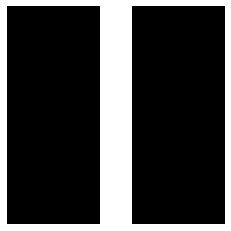

horizontal convolutional kernels:


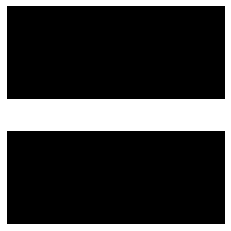

In [16]:
# function to plot filters

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

print ('vertical convolutional kernels:')

plot_image(ck[:, :, 0, 0])
plt.show()

print ('horizontal convolutional kernels:')
plot_image(ck[:, :, 0, 1])

So, we can see that the vertical and horizontal white lines were added properly.

# Apply a 2D Convolutional Layer to Images

Now we can apply a 2D convolutional layer to the images.

In [17]:
# apply a 2D convolutional layer

outputs = tf.nn.conv2d(new_images, ck, strides=1,
                       padding='SAME')

The **tf.nn.conv2d** method computes a 2D convolution given 4D input and convolutional kernel tensors. We set 'strides' equal to 1. A **stride** is the number of pixels we shift the convolutional kernels over the input matrix during training. When the stride is 1, we move the convolutional kernels 1 pixel at a time. We set 'padding' to 'SAME'. **Padding** is the amount of pixels added to an image when it is being processed by the CNN. For example, if the padding is set to zero, every pixel value that is added will be of value zero. Padding set to 'SAME' means that we use zero padding. Now, **outputs** contain the feature maps based on our images. Since each convolutional kernel creates a feature map (and we have 2 convolutional kernels), each image has 2 feature maps.

# Visualize Feature Maps

Let's visualize the feature maps we just created:

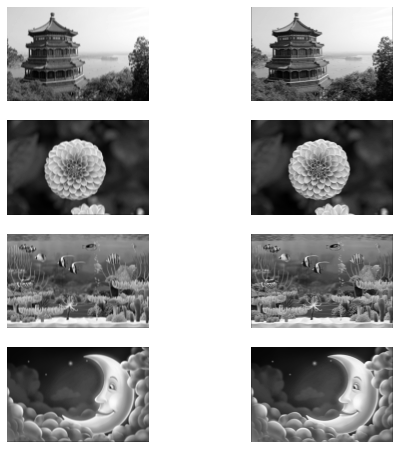

In [19]:
rows = 4  # one row for each image
columns = 2  # two feature maps for each image
cnt = 1
fig = plt.figure(figsize=(8, 8))
for i, img in enumerate(outputs):
  for j in (0, 1):
    fig.add_subplot(rows, columns, cnt)
    plt.imshow(outputs[i, :, :, j], cmap='gray')
    plt.axis('off')
    cnt += 1
plt.show()

Since we have 2 convolutional kernels and 4 images, we have 8 feature maps (2 x 4). So, we have two feature maps for each image. If we look closely, we can tell that each feature map differs slightly for each image.

# CNN with Trainable Filters

We just **manually** defined two convolutional kernels. But, in a real CNN we typically define convolutional kernels as trainable variables so the neural net can learn the convolutional kernels that work best. Let's create a very simple model that lets the network decide the best convolutional kernels.

In [20]:
from tensorflow import keras

conv = tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                              strides=1, padding='SAME',
                              activation='relu')

We begin by importing the **keras** module. We then create a **Conv2D** layer with 32 convolutional kernels. Each convolutional kernel is a 3 x 3 tensor indicated by **kernel_size**. We use a stride of 1 both horizontally and vertically. Padding is 'SAME'. Finally, we apply the ReLU activation function to the output.

As we can see, convolutional layers have quite a few hyperparameters including number of filters (convolutional kernels), height and width of convolutional kernels, strides, padding type, and activation type. To get the best performance, we should tune the hyperparameters. Since tuning is an advanced topic, we believe it is not appropriate to cover in an introductory book. Instead, we move ahead to examples to provide practice. We believe that good practice examples helps to develop practical skills. 

# Building a CNN

Although a CNN is a sequential neural net, it does differ from a feed-forward sequential neural net in two important ways. First, we build a convolutional base that is not fully connected. Second, we build a pooling layer to reduce the sample size of feature maps created by each convolutional layer. We still use a fully connected layer on top for classification.

We begin by loading a dataset of color images. We continue by preparing the data for TensorFlow consumption. We then build and test a CNN model. The dataset we start with is **cifar10**. We previously modeled this dataset, but our results were horrible. So, we want to show you how much better a CNN works with complex color images.

## Load Data

The recommended way to load **cifar10** is as a **TFDS**.

In [21]:
# import TFDS library

import tensorflow_datasets as tfds

Load train and test sets:

In [22]:
train, info = tfds.load('cifar10', split='train',
                        with_info=True, shuffle_files=True)
test = tfds.load('cifar10', split='test')

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteTEX2A1/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteTEX2A1/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Since we already have *info* from the train data, we don't need it again for the test data.

Verify tensors:

In [23]:
train.element_spec, test.element_spec

({'id': TensorSpec(shape=(), dtype=tf.string, name=None),
  'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None),
  'label': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 {'id': TensorSpec(shape=(), dtype=tf.string, name=None),
  'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None),
  'label': TensorSpec(shape=(), dtype=tf.int64, name=None)})

Train and test shapes are 32 x 32 x 3. So, each image consists of 32 x 32 pixels. The '3' means that images are RGB color.

## Display Information about the Dataset

In [24]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

We know the name, description, and homepage of the dataset. We also know the shape and datatype of feature images and labels. We know that there are 60,000 examples with train and test set splits of 50,000 and 10,000 respectively.

## Extract Class Labels

Extract some useful information from the **info** object:

In [25]:
br = '\n'

num_classes = info.features['label'].num_classes
class_labels = info.features['label'].names
print ('number of classes:', num_classes, br)
print ('class labels:', class_labels)

number of classes: 10 

class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Display Samples

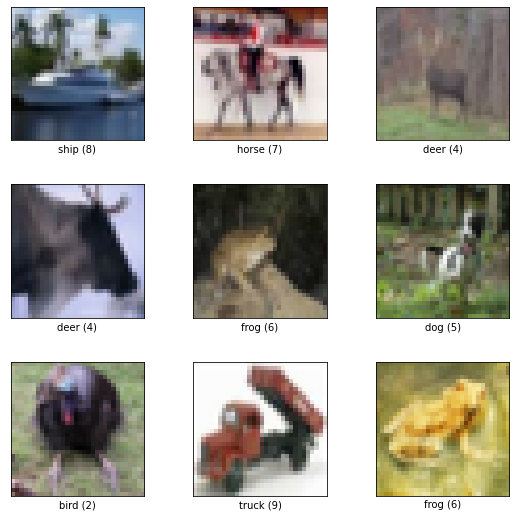

In [26]:
fig = tfds.show_examples(train, info)

## Build a Custom Function to Display Samples

Once we have the label names, we can build a custom function to display samples from the train dataset. We can even change colors!

In [27]:
import matplotlib.pyplot as plt, numpy as np

def display_samples(data, num, cmap):
  for example in data.take(num):
    image, label = example['image'], example['label']
    print ('Label:', class_labels[label.numpy()], end=', ')
    print ('Index:', label.numpy())
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32),
               cmap=plt.get_cmap(cmap))
    plt.show()

Invoke the function:

Label: horse, Index: 7


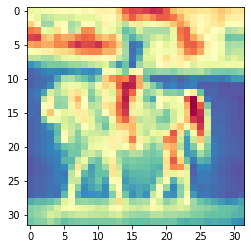

Label: ship, Index: 8


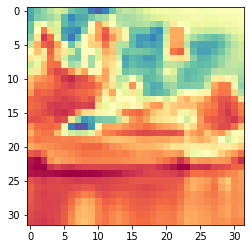

Label: deer, Index: 4


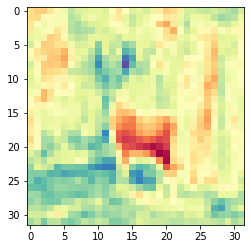

In [28]:
# choose colormap by changing 'indx'

cmap = ['coolwarm', 'viridis', 'plasma',
        'seismic', 'twilight', 'Spectral']
indx, samples = 5, 3
display_samples(train, samples, cmap[indx])

## Build a Custom Function to Display a Grid of Examples

Begin by taking 30 samples from the train set:

In [29]:
num = 30
images, labels = [], []
for example in train.take(num):
  image, label = example['image'], example['label']
  images.append(tf.squeeze(image.numpy()))
  labels.append(label.numpy())

To enable image plotting, we must remove (or squeeze) the 3 dimension from the image matrix.

Build the function:

In [30]:
def display_grid(feature, target, n_rows, n_cols, cl):
  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(feature[index], cmap='binary',
                 interpolation='nearest')
      plt.axis('off')
      plt.title(cl[target[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)

Invoke the function:

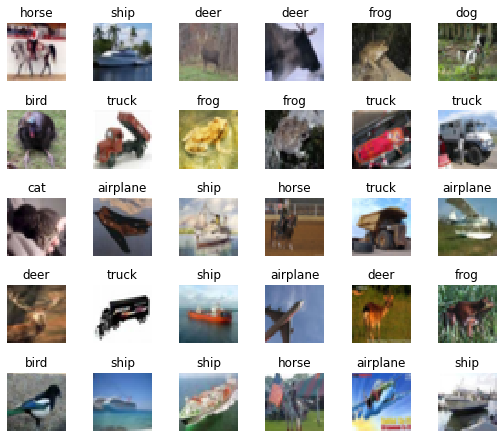

In [31]:
rows, cols = 5, 6
display_grid(images, labels, rows, cols, class_labels)

## Pinpoint Metadata

In [32]:
print ('Number of training examples:', end=' ')
print (info.splits['train'].num_examples)

print ('Number of test examples:', end=' ')
print (info.splits['test'].num_examples)

Number of training examples: 50000
Number of test examples: 10000


## Build the Input Pipeline

In [33]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

train_1 = train.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
train_2 = train_1.map(lambda items: (
    tf.cast(items['image'], tf.float32) / 255., items['label']))
train_cf = train_2.cache().prefetch(1)

test_1 = test.batch(BATCH_SIZE)
test_2 = test_1.map(lambda items: (
    tf.cast(items['image'], tf.float32) / 255., items['label']))
test_cf = test_2.cache().prefetch(1)

We create the rest of the input pipeline by shuffling (where appropriate), batching, scaling, caching, and prefetching. We scale images by mapping with a lambda function. Adding **cache()** increases performance on TFDS because data is read and written only once rather than during each epoch. Adding **prefetch(1)** is a good idea because it adds efficiency to the batching process. That is, while our training algorithm is working on one batch, TensorFlow is working on the dataset in parallel to get the next batch ready. So, prefectch can dramatically improve training performance.

Verify that train and test sets were created properly:

In [34]:
train_cf.element_spec, test_cf.element_spec

((TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)))

## Create the Model

We begin with a relatively robust CNN model because it is the only way to get decent performance from complex color images. But, don't be daunted by the number of layers! Remember that a CNN has a convolutional base and fully-connected network. So, we can think of a CNN in two parts. First, we build the convolutional base that includes one or more convolutional layers and pooling layers. Pooling layers are included to subsample the feature maps outputted from convolutional layers to reduce computational expense. Next, we build a fully-connected layer for classification.

Create the model by following these steps:

1. import libraries
2. clear previous models
3. create the model

Import libraries:

In [35]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout

Clear previous models and plant seed:

In [36]:
# clear previous models and plant seed

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create the model:

In [37]:
# build the model

model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', padding='same',
         input_shape=[32, 32, 3], strides=1),
  MaxPooling2D(2),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(2),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

The first layer is the convolutional base, which uses 32 convolutional kernels and kernel size of 3 x 3. We use relue activation, same padding, and strides of 1. We also set input shape at 32 x 32 x 3 to match the 32 x 32 pixel images. Since images are in color, we include the 3 value at the end. Next, we include a max pooling layer of size 2 (so it divides each spatial dimension by a factor of 2) to subsample the feature maps from the first convolutional layer. We then we repeat the same structure twice, but we increase the number of convolutional kernels to 64. It is common practice to double the number of convolutional kernels after each pooling layer.

We continue with the fully-connected network, which flattens its inputs because a dense network expects a 1D array of features for each instance. We need to add the fully-connected layer to enable classification of our 10 labels. We continue with a dense layer of 64 neurons. We add dropout to reduce overfitting. The final dense layer accepts 10 inputs because this is the number of labels. It uses softmax activation.

## Inspect the Model

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

**Parameters** are the number of learnable weights during training. The convolutional layer is where the CNN begins to learn. But, calculating paramaters for a CNN is more complex that a feedforward network.

The first layer is a convolutional layer with 32 neurons acting on the data. Filter size is 3 x 3. So, we have a 3 x 3 x 32 filter since our input has 32 dimensions (or neurons) for a total of 288. Multiply 288 x 3 to account for the 3D RGB color images for a total of 864. Add 32 neurons at this layer to 864 to get a total of 896 parameters.

There are no parameters to learn at the pooling layers. So, we have 0 parameters.

The second convolutional layer has 64 neurons acting on the data. Filter size is 3 x 3. So, we have a 3 x 3 x 64 filter since we have 64 dimensions for a total of 576. We multiply 32 neurons from the previous convolutional layer by 576 to get a total of 18,432. We add 64 neurons at this layer to 18,432 to get a total of 18,496 parameters.

The third convolutional layer has 64 neurons acting on the data. Filter size is 3 x 3. So, we have a 3 x 3 x 64 filter since we have 64 dimensions for a total of 576. We multiply 64 neurons from the previous convolutional layer by 576 to get a total of 36,864. We add 64 neurons at this layer to 36,864 to get a total of 32,968 parameters.

The fully connected dense layer is calculated as before. We get 262,144 by multiplying 4,096 neurons at this layer by 64 neurons from the previous layer. We add 64 neurons at this layer to 262,144 to get a total of 262,208 parameters.

The output layer has 650 parameters by mutliplying 64 neurons from the previous layer by 10 at this layer and adding 10 neurons at this layer. Whew!

## Model Layers

In [39]:
model.layers

## Compile the Model

Through experimentation, we found that the **Nadam** optimizer performed the best.

In [40]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [41]:
epochs = 10
history = model.fit(train_cf, epochs=epochs,
                    verbose=1, validation_data=test_cf)

Epoch 1/10
391/391 [==============================] - 12s 32ms/step - loss: 1.7937 - accuracy: 0.3436 - val_loss: 1.3828 - val_accuracy: 0.5030
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3890 - accuracy: 0.5031 - val_loss: 1.1815 - val_accuracy: 0.5758
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2076 - accuracy: 0.5725 - val_loss: 1.0251 - val_accuracy: 0.6492
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0869 - accuracy: 0.6168 - val_loss: 0.9631 - val_accuracy: 0.6682
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0072 - accuracy: 0.6469 - val_loss: 0.8823 - val_accuracy: 0.6944
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9315 - accuracy: 0.6725 - val_loss: 0.8781 - val_accuracy: 0.6945
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.8766 - accuracy: 0.6936 - val_loss: 0.8408 - val_accuracy: 0.7065
Epoc

Although our model is not state of the art, we do pretty well compared to a feed-forward neural net.

## Generalize on Test Data

In [42]:
print('Test accuracy:', end=' ')
test_loss, test_acc = model.evaluate(test_cf, verbose=2)

Test accuracy: 79/79 - 0s - loss: 0.8153 - accuracy: 0.7251


## Visualize Training

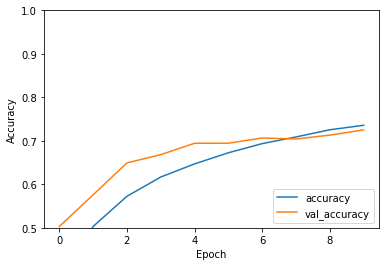

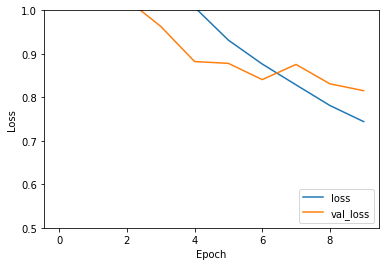

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')
plt.show()

## Predict Labels for Test Images

In [45]:
predictions = np.argmax(model.predict(test_cf), axis=-1)

Predictions by class number:

In [46]:
# predictions by class number

predictions

array([7, 0, 6, ..., 8, 6, 0])

Predictions by label:

In [47]:
# predictions by class label

np.array(class_labels)[predictions]

array(['horse', 'airplane', 'frog', ..., 'ship', 'frog', 'airplane'],
      dtype='<U10')

Get 5 predictions

In [48]:
# 5 predictions

pred_5 = predictions[:5]
pred_5

array([7, 0, 6, 8, 5])

Convert label numbers to label names:

In [49]:
pred_labels = np.array(class_labels)[pred_5]
pred_labels

array(['horse', 'airplane', 'frog', 'ship', 'dog'], dtype='<U10')

Get first five actual labels:

In [50]:
# take the first batch of images

ls = []
for _, label in test_cf.take(1):
  ls.append(label.numpy())

# slice first five from batch

actuals = ls[0][0:5]

# convert to labels

actuals = [class_labels[row] for row in actuals]
actuals

['horse', 'airplane', 'frog', 'truck', 'dog']

To get an idea of prediction performance, just compare **pred_labels** with **actual_labels**. However, it is easier to just visualize.

## Build a Prediction Plot

Take 20 samples from the test set:

In [51]:
num = 20
images, labels = [], []
for example in test.take(num):
  image, label = example['image'], example['label']
  images.append(tf.squeeze(image.numpy()))
  labels.append(label.numpy())

## Build a Custom Function

In [52]:
def display_test(feature, target, num_images,
                 n_rows, n_cols, cl, p):
  for i in range(num_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plt.imshow(feature[i])
    title_obj = plt.title(cl[target[i]] + ' (' +\
                          cl[p[i]] + ') ')
    if cl[target[i]] == cl[p[i]]:
      title_obj
    else:
      plt.getp(title_obj, 'text')
      plt.setp(title_obj, color='r')
  plt.tight_layout()
plt.show()

## Invoke the Function

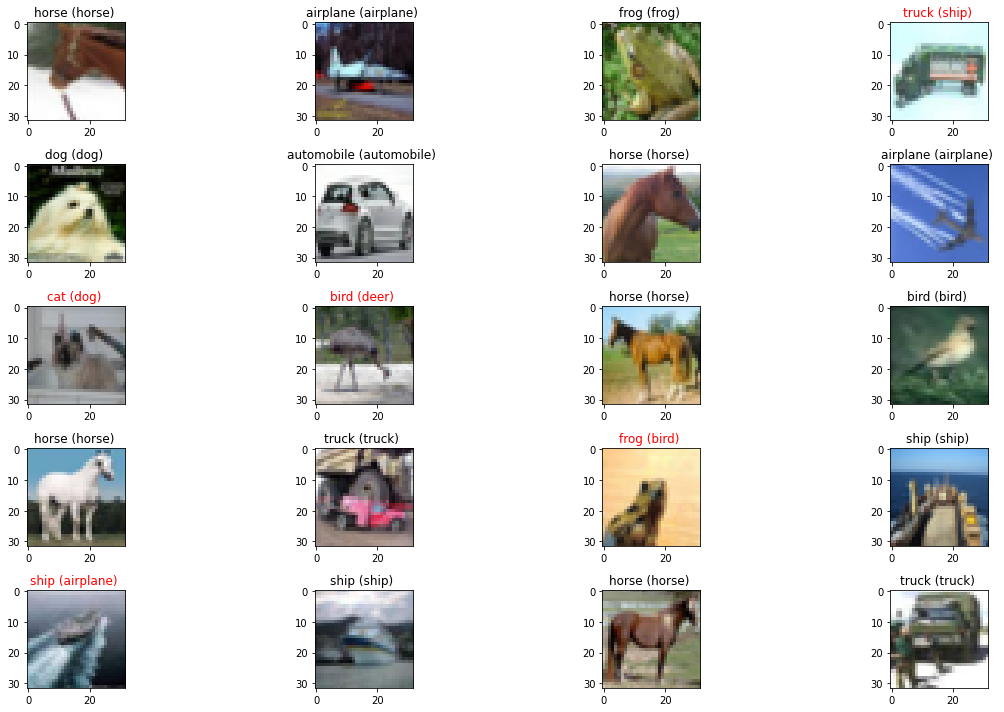

In [53]:
num_rows, num_cols = 5, 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
display_test(images, labels, num_images, num_rows,
             num_cols, class_labels, predictions)

Titles in <strong><font color=red>red</font></strong> indicate misclassifications.

# Build a CNN with Keras Data

Although loading TFDS data is recommended, Keras is very popular in industry. So, let's build a model from *keras.datasets*.

Load train and test data:

In [54]:
train_k, test_k = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## Verify Data Shapes:

In [55]:
print ('train data:', br)
print (train_k[0].shape)
print (train_k[1].shape, br)
print ('test data:', br)
print (test_k[0].shape)
print (test_k[1].shape)

train data: 

(50000, 32, 32, 3)
(50000, 1) 

test data: 

(10000, 32, 32, 3)
(10000, 1)


Our dataset contains 50,000 train samples of 32 x 32 three channel images and one channel labels. It also contains 10,000 test samples of 32 x 32 three channel images and one channel labels. 

## Create Class Label Names

With a TFDS, we can directly extract class label names. But, we must manually create class label names since we loaded the Keras dataset.

Create a variable to hold label names:

In [56]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

## Create Simple Variables to Hold Train and Test Samples

In [57]:
# create simple variables from train tuple

train_images = train_k[0]
train_labels = train_k[1]

# display first train label

print ('1st train label:', class_labels[train_labels[0][0]])

# create simple variables from test tuple

test_images = test_k[0]
test_labels = test_k[1]

# display first test label

print ('1st test label: ', class_labels[test_labels[0][0]])

1st train label: frog
1st test label:  cat


## Display Sample Images

It's always a good idea to display some images. In this case, we display 30 images from the training data. Visualization allows us to verify that images and labels correspond. That is, a frog image is labeled as a frog and so on.

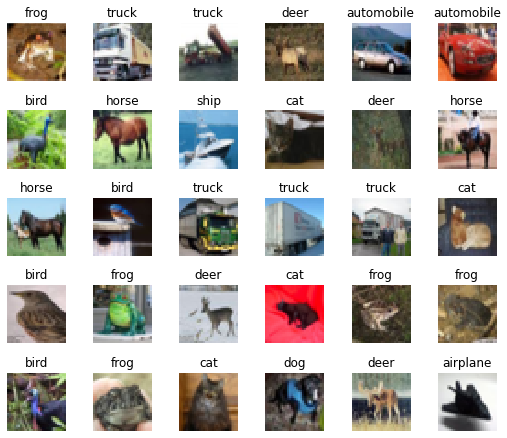

In [58]:
n_rows = 5
n_cols = 6
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(train_images[index], cmap='binary',
               interpolation='nearest')
    plt.axis('off')
    plt.title(class_labels[int(train_labels[index])],
              fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Create the Input Pipeline

Begin the input pipeline by scaling and slicing images:

In [59]:
# scale images

train_img_sc = train_images / 255.  # divide by 255 to scale
train_lbls = train_labels.astype(np.int32)

test_img_sc = test_images/255.  # divide by 255 to scale
test_lbls = test_labels.astype(np.int32)

# slice data

train_ks = tf.data.Dataset.from_tensor_slices(
    (train_img_sc, train_lbls))
test_ks = tf.data.Dataset.from_tensor_slices(
    (test_img_sc, test_lbls))

## Shuffle (where appropriate), Batch, and Prefetch

In [60]:
# shuffle, batch, and prefetch

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 5000

train_ds = train_ks.shuffle(
    SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_ds = test_ks.batch(BATCH_SIZE).prefetch(1)

Inspect tensors:

In [61]:
train_ds, test_ds

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.int32)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.int32)>)

## Create the Model

In [62]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout 

# clear previous models and plant a seed

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

# build the model

model = Sequential([
  Conv2D(32, 3, activation = 'relu', padding='same',
         input_shape=[32, 32, 3]),
  MaxPooling2D(2),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPooling2D(2),
  Conv2D(64, 3, activation='relu', padding='same'),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

## Compile and Train

In [63]:
# compile

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train

epochs = 10
history = model.fit(train_ds, epochs=epochs,
                    verbose=1, validation_data=test_ds)

Epoch 1/10
391/391 [==============================] - 4s 11ms/step - loss: 1.7868 - accuracy: 0.3529 - val_loss: 1.4063 - val_accuracy: 0.4969
Epoch 2/10
391/391 [==============================] - 3s 9ms/step - loss: 1.3833 - accuracy: 0.5077 - val_loss: 1.1491 - val_accuracy: 0.5876
Epoch 3/10
391/391 [==============================] - 3s 9ms/step - loss: 1.2019 - accuracy: 0.5766 - val_loss: 1.0087 - val_accuracy: 0.6495
Epoch 4/10
391/391 [==============================] - 3s 9ms/step - loss: 1.0872 - accuracy: 0.6199 - val_loss: 0.9211 - val_accuracy: 0.6749
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 1.0086 - accuracy: 0.6439 - val_loss: 0.9035 - val_accuracy: 0.6846
Epoch 6/10
391/391 [==============================] - 3s 9ms/step - loss: 0.9415 - accuracy: 0.6704 - val_loss: 0.8893 - val_accuracy: 0.6881
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.8875 - accuracy: 0.6879 - val_loss: 0.8314 - val_accuracy: 0.7118
Epoch

## Predict

In [64]:
pred_ks = np.argmax(model.predict(test_images), axis=-1)

## Visualize

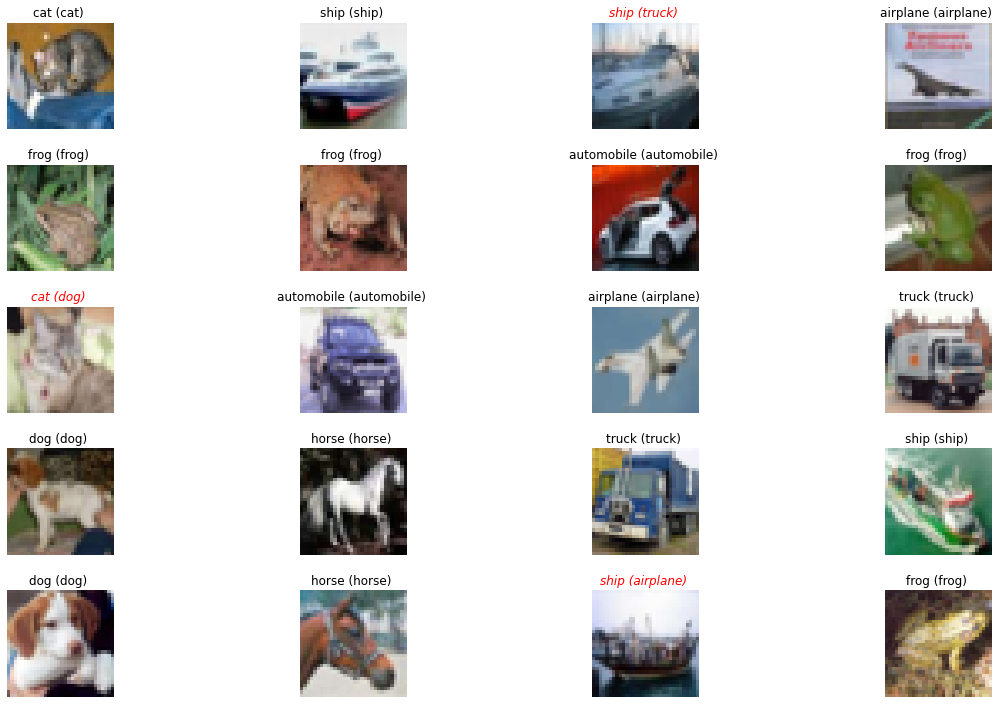

In [65]:
# Plot the first X (num_rows * num_cols) test images
# (true and predicted labels)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  ax = plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(test_images[i])
  title = class_labels[int(test_labels[i])] + ' (' +\
  class_labels[pred_ks[i]] + ') '
  plt.title(title)
  if class_labels[int(test_labels[i])] !=\
     class_labels[pred_ks[i]]:
    ax.set_title(title, style='italic', color='red')
  plt.axis('off')
plt.tight_layout()

# Epilogue

Many improvements to the fundamental CNN architecture have been developed over the past few years that vastly improve prediction performance. Although we didn't cover these advances in this lesson, we believe that we have provided the basics to help you comfortably work with these recent advances and even the many advances to come.